# Dictionary learning applied on the MNIST dataset

By Hans Barstad Westbye, Sebastian Eide Aas and Edgar Fürst Hellsegg 

### Introduction

Dictionary learning is a subfield of machine learning which has many areas of application. In this report, we'll use this technique on the MNIST dataset, which contains $70 000$ handwritten digits from $0$ to $9$. The goal of this report is to assess the effectiveness of the ways we implement dictionaries for the classification of this dataset. We will use two different methods to create dictionaries; singular value decomposition and examplar-based non-negative matrix factorization, further called SVD and ENMF. 
Both methods are widely used in machine learning and image classification tasks, and are sufficient in reducing the dimensionality of the data while preserving the most important information. In this report, we will compare the perfomance of these two methods when using a score function to classify the data. Furthermore we will divide this project into three tasks; in the first we will implement the general SVD and ENMF method to create dictionaries, in the second task we will use the implementet techniques on the MNIST dataset to create dictionaries and lastly we will quantitatively analyze the methods and compare them.

### Task 1

For this task we will implement the matrixfactorization techniques and define their corresponding dictionaries. We will use the properties of these dictionaries to further implement functions which will help us classify integers later in the project. We will observe the behaviour of the factorization by looking at the matrices <p align="center">

$A_1=\begin{bmatrix}
1000 & 1\\
0 & 1\\
0 & 0
\end{bmatrix}, A_2=\begin{bmatrix}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 1
\end{bmatrix},
B=\begin{bmatrix}
2 & 0 & 0\\
1 & 0 & 1\\
0 & 1 & 0
\end{bmatrix}.$

</p>

In ENMF a matrix $A$ is factorized into $A = WH$, where $W=U_d$ is the dictionary and the weights are $H=\Sigma_dV_d^{T}$. For the SVD method the factorization is $A = U_{d} \Sigma V_{d}$, where $U_{d}$ is the dictionary, $\Sigma$ is the singular values and $V^{T}$ is the upper singular eigenvectors. 

The first thing we want to do is to calculate the SVD for both $A_1$ and $A_2$, and check if the SVD actually can reconstruct the original matrices. We will then see if the dictionary, $U=W_d$, contains relevant information stored in the basis vectors. Furthermore, we will create a function that finds the dictionary $W$ and the weights $H=\Sigma_dV_d^{T}$, since this will be done multiple times in the coming tasks.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install tabulate
from tabulate import tabulate

In [2]:
#TASK 1a)

#creates matrix
A1 = np.array([[1000, 1], [0, 1], [0, 0]])

#calculates the SVD 
U1, Sigma1, Vtrans1 = np.linalg.svd(A1, full_matrices=False)

#prints the individual matrices
print(f"U =\n {U1},\n Sigma = {Sigma1},\n V_transposed =\n {Vtrans1}")

#checks the SVD calculation and prints the matrix
A1reconstructed = np.dot(U1*Sigma1, Vtrans1) #Because Sigma1 is returned as an 1D-array
print(f"A1=\n{A1}")
print(f"A1_reconstructed=\n{A1reconstructed}")

U =
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]],
 Sigma = [1.0000005e+03 9.9999950e-01],
 V_transposed =
 [[ 0.9999995  0.001    ]
 [-0.001      0.9999995]]
A1=
[[1000    1]
 [   0    1]
 [   0    0]]
A1_reconstructed=
[[ 1.00000000e+03  1.00000000e+00]
 [-2.16840434e-19  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]


In [3]:
#TASK 1b)

#creates matrix
A2 = np.array([[1, 0, 0], [1, 0, 0], [0, 0, 1]])

#calculates the SVD
U2, Sigma2, Vtrans2 = np.linalg.svd(A2, full_matrices=False)

#prints the individual matrices
print(f"U =\n {U2}\n Sigma = {Sigma2}\n V_transposed =\n {Vtrans2}")

#checks the SVD calculation and prints the matrices
A2reconstructed = np.dot(U2*Sigma2, Vtrans2)
print(f"A2 =\n {A2}")
print(f"A2 reconstructed=\n{A2reconstructed}")

U =
 [[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]]
 Sigma = [1.41421356 1.         0.        ]
 V_transposed =
 [[-1. -0. -0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
A2 =
 [[1 0 0]
 [1 0 0]
 [0 0 1]]
A2 reconstructed=
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [4]:
def truncSVD(U, Sigma, Vtrans, d):
    '''
    Calculates the truncated SVD of a matrix A 

    Parameters
    ----------
    U : 2D-array
        the lower singular eigenvectors.
    Sigma : 1D-array
        the singular values.
    Vtrans : 2D-array
        the upper singular eigenvectors.
    d : int
        number of basis vectors.

    Returns
    -------
    W : 2D-array
        the final dictionary after removing d columns.
    H.T: 2D-array
        the weights.

    '''
    W = U[:, :d]                                                       #gets the dictionary by slicing the matrix U
    H = Sigma[:d]*Vtrans[:d, :].T                                      #calculates the weights H
    return W,H.T

As we can see from the reconstructed matrix in $1a)$, we get the exact same matrix that we started with. Even though we get one of the elements to be $-2.18\cdot10^{-19}$, instead of zero, we can neglect this and interpret it as zero due to the floating point errors one gets when calculating this numerically and because the exponential is incredibly small. We can also see from the $\Sigma$ array that we don't have any singular values that's zero. That means that every column in the dictionary $U = W_1$ contains relevant information when reconstructing $A_1$. One could also achieve a perfect reconstruction of $A_1$ when $\Sigma$ has only non-zero values equal to the rank of $A_1$. We know that the largest singular value corresponds to the left most column in $U_1$. This column contains the most information about the matrix $A_1$ and therefore it is the most important for reconstructing the matrix.

From the reconstructed matrix in $1b)$, we see that we get the exact matrix back. From the $\Sigma$ array, we observe that we get the third singular value to be zero. This means that the corresponding basis vector in $U=W_2$, the third column in $U$, can be neglected as it contains minimal useful information about the matrix $A_2.$ We also know that the rank of $A_2$ is equal to the number of non-zero singular values, and in this case the rank of $A_2$ equals two. This tells us that we can safely use a reduced SVD to obtain $A_2$ for $d=2$. 
 
Furthermore we want to calculate the projection, given from the equation in the assignment as

$$P_W(B)=WW^{T}B.$$

Moreover, we want to calculate the distance from $B$ down to $W_1$ and $W_2$. This will be done using the equation

$$D_W(b) = \min_{h \in \mathbb{R^{d}}} \|b-Wh||_2.$$
 
These functions will provide useful in the later tasks, as they will be the foundation to get our machine learning model to be able to classify the MNIST dataset properly. 


In the subsequent code we follow the implementation detail given in the assignment, calculating $W^{T}B$ first and then $WW^{T}B$. This is to reduce the computation speed and storage space required.

In [5]:
#TASK 1c)

#create the matrix B
B = np.array([[2, 0, 0], [1, 0, 1], [0, 1, 0]])

def orthproj(W,B):
    '''
    Calculates the orthogonal projection of B to W

    Parameters
    ----------
    W : 2D-array
        the dictionary.
    B : 2D-array
        the datasets.

    Returns
    -------
    projection : 2D-array
        the projection of B to W.

    '''
    A = np.dot(W.T,B)                                                           # calculates this product first to save storage and run time
    projection = np.dot(W,A)                                                    # calculates the rest of the projection
    return projection

def columnwiseDistance(W,B):
    '''
    Calculates the columnwise distance from B to W

    Parameters
    ----------
    W : 2D-array
        the dictionary.
    B : 2D-array
        contains the datasets.

    Returns
    -------
    distance : 1D-array
        contains the distance from B to W.

    '''
    projection = orthproj(W,B)                                                  #gets the projection
    C = B - projection                                                          #the matrix to use the norm on
    distance = np.linalg.norm(C, axis = 0)                                      #calculates the distance
    return distance


print(f"Orthogonal projection for A1:\n {orthproj(U1,B)}")
print(f"Distance from B to W1: {columnwiseDistance(U1,B)}")

print(f"Orthogonal projection for A2:\n {orthproj(U2[:, :2],B)}")
print(f"Distance from B to W2: {columnwiseDistance(U2[:, :2],B)}")

Orthogonal projection for A1:
 [[2. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]]
Distance from B to W1: [0.00000000e+00 1.00000000e+00 1.11022302e-16]
Orthogonal projection for A2:
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]
Distance from B to W2: [0.70710678 0.         0.70710678]


We see that the distance $D_1\approx\begin{bmatrix} 0 & 1 & 0 \end{bmatrix}.$ Since $b_1$ and $b_3$ is in the range of $A_1$, the distance has to be zero. This is because these vectors can be written as a linear combination of the basis vectors of $A_1$. Using the same logic on $D_2$, we see that only $b_2$ can be written as a linear combination of the basis vectors of $A_2$, and therefore this distance is zero to this vector. 

To test the ENMF approach we'll use the equation for the non-negative projection, 

$$P_{W_+}^{+}=W_+H^{*}$$. 

However, the calculation of $H^{*}$ does not have a closed form. Thats why we have to calculate it numerically, using the algorithm

$$H_{k+1}\leftarrow H_k\odot(W_+^{T}A)\oslash(W_+^{T}W_+H_k+\delta)$$

We note that $\odot$ and $\oslash$ is the symbols for the Hadamard product and Hadamard division, respectively. The distances from $B$ to $W_1$ and $W_2$ is calculated similarly to the way we calculated them in task $1c)$. 

In the code below, we implement another detail from the assignment. To secure less computation time and more efficiency, we calculate $W^{T}B$ and $W^{T}W$ outside the for-loop as they will be constant and therefore not nescessary to calculate for each iteration. In addition to this implementation, we use $50$ as the maximum number of iterations when calculating $H^{*}$. Even though this algorithm has a convergence criteria, we use $50$ to ensure less computational time.

In [6]:
#TASK 1d)

d = 2 #number of basis vectors

#create the dictionaries
W1 = A1[:, np.random.choice(A1.shape[1],d, replace = False)]
W2 = A2[:, np.random.choice(A1.shape[1],d, replace = False)]

def nnproj(W, B, delta, maxiter):
    '''
    Calculates the non-negative projection

    Parameters
    ----------
    W : 2D-array
        the dictionary.
    B : 2D-array
        the new datasets.
    delta : float
        safe-division factor.
    maxiter : int
        maximum number of iterations.

    Returns
    -------
    proj : 2D-array
        the projection.
    Hinit : 2D-array
        the weights.
    W : 2D-array
        the dictionary.

    '''
    d = len(W.T)                                                               #size of d
    n = len(B.T)                                                               #size of n
    Hinit = np.random.uniform(0,1,(d,n))                                       #creates a random initial matrix with shape (d,n)
    C = W.T@B                                                                  #calculates these products as they will remain constant
    D = W.T@W
    for i in range(maxiter):                                                   #calculates the weights 
        Hinit = Hinit*C/(D@Hinit + delta)
        
    proj = W@Hinit                                                             #calculates the projection
    return proj,Hinit,W


def nnDistance(B, delta, maxiter, W):
    '''
    Calculates the non-negative distance

    Parameters
    ----------
    B : 2D-array
        contains the new datasets.
    delta : float
        safe-division factor.
    maxiter : int
        maximum number of iterations.
    W : 2D-array
        the dictionary.

    Returns
    -------
    distance : 1D-array
        contains the distances.

    '''
    projA1, H1, W1 = nnproj(W, B, delta, maxiter)                               #gets the projection
    C = B - projA1                                                              #the matrix to use the norm on
    distance = np.linalg.norm(C, axis = 0)                                      #calculates the distance
    return distance
    
projA1, H1, W1 = nnproj(W1, B,10**-10, 50)
projA2, H2, W2 = nnproj(W2, B, 10**-10, 50)
print(f"The non-negative projection of A1 is: \n {projA1} \n The non-negative projection for A2: \n {projA2}")
print(f"The resulting weights for A1: \n {H1} \n The resulting weights for A2: \n {H2}")

print(f"Projection of A1 reconstructed is: \n {np.dot(W1, H1)} \n Projection of A2 reconstructed is: \n {np.dot(W2, H2)}")

distance1 = nnDistance(B,10**-10, 50, W1)
distance2 = nnDistance(B,10**-10, 50, W2)
print(f"Distance for A1: {distance1}\n Distance for A2: {distance2}")

The non-negative projection of A1 is: 
 [[2.00091424 0.         0.5       ]
 [0.99816648 0.         0.5       ]
 [0.         0.         0.        ]] 
 The non-negative projection for A2: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  0.  0. ]]
The resulting weights for A1: 
 [[0.00100275 0.         0.        ]
 [0.99816648 0.         0.5       ]] 
 The resulting weights for A2: 
 [[1.5 0.  0.5]
 [0.  0.  0. ]]
Projection of A1 reconstructed is: 
 [[2.00091424 0.         0.5       ]
 [0.99816648 0.         0.5       ]
 [0.         0.         0.        ]] 
 Projection of A2 reconstructed is: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  0.  0. ]]
Distance for A1: [0.00256102 1.         0.70710678]
 Distance for A2: [0.70710678 1.         0.70710678]


As we can see, we successfully managed to reconstruct the projection of $A_1$ and $A_2$, which means that our code works properly. Using the same logic as in $1c)$, we find it reasonable that $D_1\approx\begin{bmatrix}0 & 1 & \frac{1}{\sqrt2} \end{bmatrix}$. This is because of the difference between linear and non-negative linear algebra. When calculating the non-negative projection, we project onto cones rather than lines. This means that $b_2$ here is in the non-negative span of the basis vectors of $A_1$, but not in the "normal" span. Even though we get a sligthly larger number than zero, we accept this error as this occurs due to floating errors when doing numerical calculations. As for $D_2$, we note that no vectors from $B$ is in the non-negative span of the basis vectors of $A_2$. 

### Task 2


As we now have the matrix factorization implementation and dictionaries in order, we can begin to train our model using data from the MNIST dataset. To do this, we will use the previously written functions to calculate the dictionaries, projections and distances. Furthermore we want to qualitatively look at the differences between the projections and distances as $d$ increases, as well as the result when we calculate this for a different integer than what $W$ is trained on. 

The first thing we do is to load the data, using the handed out code. 

In [7]:
# Load the data and rescale
train = np.load('train.npy')/255.0
test = np.load('test.npy')/255.0

# Shapes are (number of pixels, number of classes, number of data)
print(train.shape) # Should be (784,10,5000)
print(test.shape) # Should be (784,10,800)

(784, 10, 5000)
(784, 10, 800)


Below is the handed out code that plot images on a grid. 

In [8]:
def plotimgs(imgs, nplot = 4):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise
    input:
        imgs: (height*width,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    assert(n > nplot**2), "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")
    
    # Plot

    fig.tight_layout()
    plt.show()

The below code extracts $n = 1000$ datapoints from the training data of a chosen class and stores it in a $(m,n)$ array called `A` that we can for example apply the SVD to.

In [9]:
n = 1000 # Number of datapoints
c = 3 # Class
A = train[:,c,:n]


Now we will calculate the SVD of $A$, where $A$ is a matrix of the dataset containing only data corresponding to the integer $3$. We shall plot the images of the first $16$ left singular vectors. As we saw in task $1$, the first $16$ singular vectors will represent the most important features of the dataset. Therefore we can expect the plot of the $16$ first vectors to represent the most important features of the integer $3$ from the dataset.  Furthermore, we will plot the singular values from highest to lowest to present a graphical understanding of how the singular values changes with the number of basis vectors.


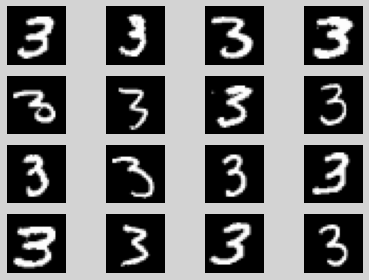

In [10]:
#TASK 2a)

#Plots the first 16 images of the integer three
plotimgs(train[:,3,:], nplot = 4)

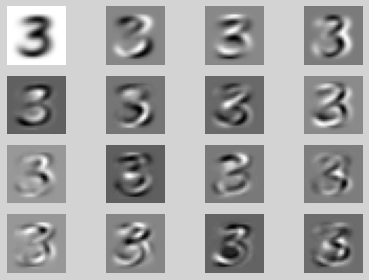

In [11]:
#TASK 2b)

#calculates the SVD and plots the first 16 images
U, Sigma, V_trans = np.linalg.svd(A, full_matrices=False)
W, H = truncSVD(U, Sigma, V_trans, 17)
plotimgs(W, nplot=4)
plt.show()

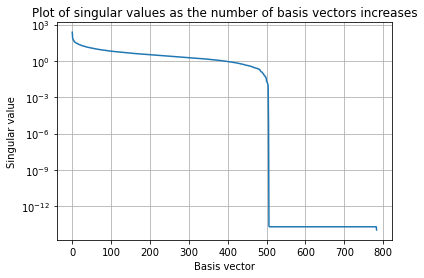

The rank of A is 506


In [12]:
#plots the singular values
plt.semilogy(Sigma, '-')
plt.grid()
plt.title("Plot of singular values as the number of basis vectors increases")
plt.xlabel("Basis vector")
plt.ylabel("Singular value")
plt.show()

#checks the rank of A
rankA = np.linalg.matrix_rank(A)
print(f'The rank of A is {rankA}')

From the plot of the first 16 left singular vectors of A, we can see how the plots contain a clear number which is easy to distinguish. We can also conclude that based on the dataset we have trained the dictionary on, that these are the most significant features of the number.
We see that the calculation of the rank of A is $506$, which means that we should expect $506$ non-zero elements in $\Sigma$. It is these $506$ basisvectors that are able to reconstruct $A$ perfectly. As we can observe from the plot of the singular values there are non-zero values after vector $506$. This is because of numerical errors, but since they are extremely small, they contain little to no information and we interpret them as zero.

Our next step is to calculate the projection $P_W(b)$, where $b$ represents just one image of the integer $3$. This one image can also be referred to as a single column of $A$. To demonstrate how the images are dependent on the number of basis vectors, we will calculate the projection four times with $d = 16,32,64,128$. To compare the quality of the images of the projections, the original image will also be presented. To highlight the instrumental role of training the algorithm, we will repeat these calculations with the integer $4$ rather than $3$. This will result in four images of the chosen integer $4$, albeit the algorithm is still trained on the previous integer $3$. The images resulting from the new calculations of the projection should underline the difference training the algorithm has on the results.


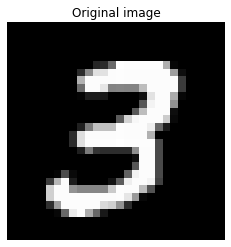

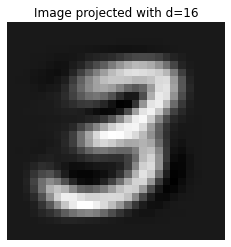

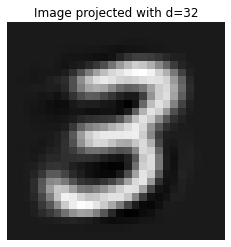

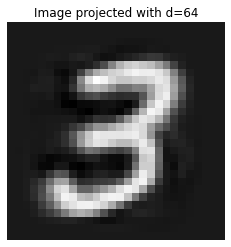

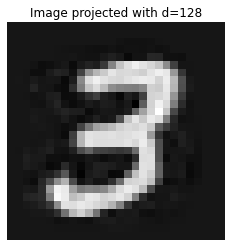

In [13]:
#TASK 2c)

A = train[:,3,0] #gets the first image from the dataset

#calculates the projection for given d
W, H = truncSVD(U, Sigma, V_trans, 16)
W1, H1 = truncSVD(U, Sigma, V_trans, 32)
W2, H2 = truncSVD(U, Sigma, V_trans, 64)
W3, H3 = truncSVD(U, Sigma, V_trans, 128)
projection = orthproj(W,A)
projection1 = orthproj(W1,A)
projection2 = orthproj(W2,A)
projection3 = orthproj(W3,A)

#plots the original image
plt.imshow(A.reshape((28,28)), cmap = 'gray')
plt.title("Original image")
plt.axis('off')
plt.show()

#plots the projections
plt.imshow(projection.reshape((28,28)), cmap = 'gray')
plt.title("Image projected with d=16")
plt.axis("off")
plt.show()
plt.imshow(projection1.reshape((28,28)), cmap = 'gray')
plt.title("Image projected with d=32")
plt.axis("off")
plt.show()
plt.imshow(projection2.reshape((28,28)), cmap = 'gray')
plt.title("Image projected with d=64")
plt.axis("off")
plt.show()
plt.imshow(projection3.reshape((28,28)), cmap = 'gray')
plt.title("Image projected with d=128")
plt.axis("off")
plt.show()

One can clearly see from the five images that the integer depicted is the number $3$. The original image is not surprisingly the clearest of the five. As the number of basis vectors increase the image becomes sharper, and the outline of the number becomes clearer. This is expected, as an increased amount of basis vectors would allow the projection to be closer to the original.

Now we will see what happens when we project the number $4$ on a dictionary trained on the number $3$. 

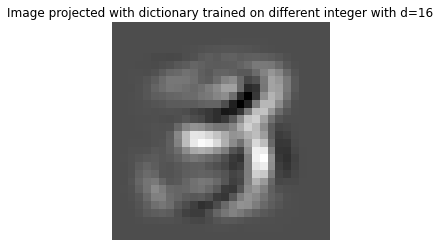

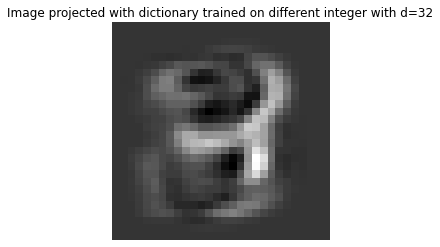

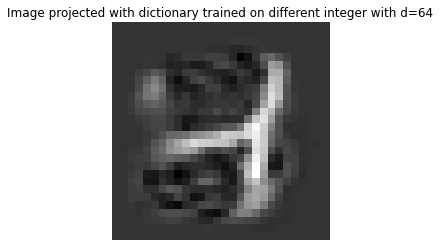

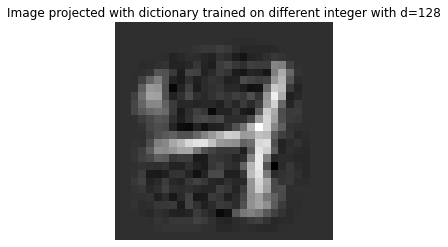

In [14]:
#calculates the projection on to a different integer than what W is trained on
projection = orthproj(W,train[:,4,:1])
projection1 = orthproj(W1,train[:,4,:1])
projection2 = orthproj(W2,train[:,4,:1])
projection3 = orthproj(W3,train[:,4,:1])

#plots the projections
plt.imshow(projection.reshape((28,28)), cmap = 'gray')
plt.title("Image projected with dictionary trained on different integer with d=16")
plt.axis("off")
plt.show()
plt.imshow(projection1.reshape((28,28)), cmap = 'gray')
plt.title("Image projected with dictionary trained on different integer with d=32")
plt.axis("off")
plt.show()
plt.imshow(projection2.reshape((28,28)), cmap = 'gray')
plt.title("Image projected with dictionary trained on different integer with d=64")
plt.axis("off")
plt.show()
plt.imshow(projection3.reshape((28,28)), cmap = 'gray')
plt.title("Image projected with dictionary trained on different integer with d=128")
plt.axis("off")
plt.show()

When we project for a different integer than the algorithm is trained on, we get very blurry images. For $16$ basis vectors one can observe the basic outline of a number $3$, however the integer we wanted to project for was number $4$. When observing the image for $32$ basis vectors the image does not resemble a number at all. Increasing the number of basis vectors to $64$ gives us an image which resembles a combination of a $3$ and a $4$. It is only after projecting for $128$ basis vectors that the image at all resembles the integer we projected for. The difference in clarity and crispness in the images when the algorithm is trained on the integer, and when it is not, is very significant. This highlights the importance of training the algorithm correctly to get satisfactory results.

In the code below we will study how the number of basis vectors affect the Frobenius norm

$$\||A-P_W(A)||^2_F.$$  

This will tell us quantitatively what happens as the number of basis vector increases. We will write a function that calculates the norm using functions from previously in this rapport. Then we will plot the value of the Frobenius norm against the increase of basis vectors from $1$ to $784$. Similar to task $2c)$ we will also calculate the Frobenius norm for a different integer than the algorithm is trained on.

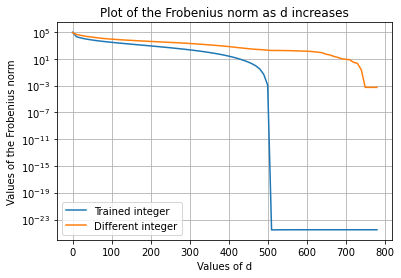

In [15]:
#TASK 2d)

A = train[:,3,:1000] #gets the first 1000 images from the dataset

def increasingd(U, Sigma, Vtrans,A, d):
    '''
    Calculates the Frobenius-norm for increasing d using the SVD-method

    Parameters
    ----------
    U : 2D-array
        contains the lower singular vectors.
    Sigma : 1D-array
        contains the singular values.
    Vtrans : 2D-array
        contains the upper singular vectors.
    A : 2D-array
        datasets.

    Returns
    -------
    values : 2D-array
        contains the value of the Frobenius-norm for each d.

    '''
    values = np.zeros(len(d))                                                      #empty array 
    for i in range(len(d)):                                                        #calculates the Frobenius norm and adds it to the array
        W, H = truncSVD(U, Sigma, Vtrans, int(d[i]))
        x = columnwiseDistance(W[:,:int(d[i])],A)**2
        values[i] = np.sum(x)                                                      
    return values

#plots the Frobenius-norm as a function of the basis vectors d
d = np.arange(0,784,10)
values = increasingd(U, Sigma, V_trans,A, d)
valuesDiffInt = increasingd(U, Sigma, V_trans,train[:,4, :1000], d)                #Uses "train[:,4,:1000]" so that the function calculates values for a different integer
plt.semilogy(d,values, label = "Trained integer")
plt.semilogy(d,valuesDiffInt, label = "Different integer")
plt.legend()
plt.xlabel("Values of d")
plt.ylabel("Values of the Frobenius norm")
plt.title("Plot of the Frobenius norm as d increases")
plt.grid()
plt.show()

What we can observe from the plot is how we, for the trained integer, get a large Frobenius value for a small amount of basis vectors and small value for large amount of basis vectors. Whereas for the different integer we have a constantly large value for the Frobenius value. This makes sense as the more basis vectors we choose for the dictionary, the more information the dictionary will contain from the dataset. The distance of the projection of the dataset onto its dictionary will therefore be small if we have more information about the matrix in its dictionary. Since the dictionary is not trained for the different integer it is also logical that the distance of the projection is large no matter how much information we choose to have in the dictionary. We can therefore conclude that a dictionary will contain more information about the image of an integer if we choose a large amount of basis vectors.

The interesting result here is that these plots are more or less identical to the plot of the singular values. As the singular value represents how important certain information is, we can choose how much information we want in the dictionary by choosing how many singular values we want and consequently add more basisvectors to the dictionary. And as we saw in the plot above, by adding more information and increasing the amount of basisvectors, the Frobenius norm will decrease. The plots are so similar because by adding a singular value of a certain importance will decrease the Frobenius value as much as the amount of information the singular value holds. 

Previously we have studied the SVD-approach, and now we want to look at how the ENMF-method compares to the SVD. We'll use exemplar-based dictionaries, and previously defined functions to calculate the non-negative projeciton onto these dictionaries. We'll also plot this result against the result of the SVD, and compare the two methods. 

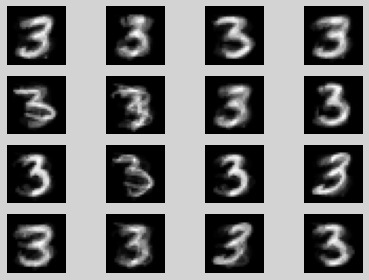

In [16]:
#TASK 2e)

#plots using the ENMF-method
A = train[:, 3, :] #gets the entire data set for the given class
W = A[:, np.random.choice(A.shape[1],32, replace = False)] #samples the 32 first columns of A
proj,H_init,W = nnproj(W,A, 10**-10, 50)
plotimgs(proj, nplot = 4)
plt.show()

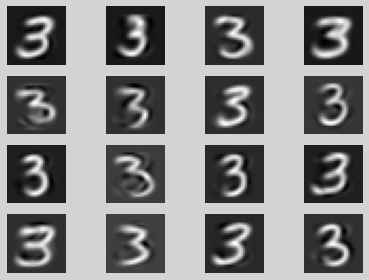

In [17]:
#plots using the SVD-method
U, Sigma, V_trans = np.linalg.svd(A,full_matrices=False) 
W, H = truncSVD(U, Sigma, V_trans, 32)
proj_SVD = orthproj(W,A)
plotimgs(proj_SVD, nplot = 4)
plt.show()

The two plots differ slightly from each other. Ideally the plot from the SVD should produce the clearest pictures as the SVD-method uses the $16$ leftmost vectors, who contain the most valuable information. On the other hand, the ENMF-method in this case, uses $16$ random vectors from the $5000$ we have available. Consequently, some of the images should be worse than the images from SVD because some of the basis vectors should contain less information than the ones from the SVD. The ENMF method will have a probability of choosing an image amongst the images in A, which is not a typical representation of the images of the said number. The SVD will however to be able to recognize this image as a non typical image, as it does not look like any of the other images of the integer. It is difficult to determine whether this translates to the plots presented, however we can observe that the outline of the numbers from the SVD appears clearer and less blurry. 
As we can see from the two different plots, for respectively the ENMF and SVD method, the two methods have different numbers they think are easier to project. A more crisp picture is a picture with a low value for the frobenius norm. This makes sense and should be expected as the SVD and ENMF method have different basisvectors. To simplify one could say that for the SVD method it is easier to project clearly written numbers.

Now that we have seen the images that we get using the non-negative projection onto examplar-based dictionaries, we want to look at how the Frobenius-norm behaves for increasing $d$. The only difference here in comparison to the SVD approach is using the ENMF-method. Otherwise, the approach is more or less the same. We'll compare this result to the SVD, and see if there are any noticable differences. 

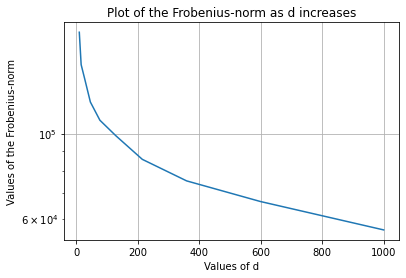

In [18]:
#TASK 2f)

A = train[:, 3,:]

def increasingdENMF(W,A,d):
    '''
    Calculates the Frobenius-norm for increasing d using the ENMF-method

    Parameters
    ----------
    W : 2D-array
        dictionary.
    A : 2D-array
        datasets.
    d : 1D-array
        the axis used to calculate the norm.

    Returns
    -------
    values : 1D-array
        contains the distance for each d.

    '''
    values = np.zeros(len(d))                                                   #array with zeros
    for i in range(len(d)):                                                     #calculates the norm and adds it to the list
        W = A[:, np.random.choice(A.shape[1],d[i], replace = False)]
        x = nnDistance(A, 10**-10, 50, W)**2 
        values[i] = np.sum(x)                                                    
    return values

d = np.logspace(1,3,10,dtype = np.int64)
values = increasingdENMF(W,A,d)
plt.semilogy(d,values)
plt.xlabel("Values of d")
plt.ylabel("Values of the Frobenius-norm")
plt.title("Plot of the Frobenius-norm as d increases")
plt.grid()
plt.show()

The first thing we notice here is that the distance is relatively large even for large values of $d$. As pointed out in the assignment, this could be caused by numerical errors in the projection method. This is because the calculation of the matrix $H^{*}$ using the numerical algorithm described in task $1d)$ doesn't converge for the number of iterations chosen in this task. As we would need a very large amount of iterations, we've settled with $50$ so that the computation time would be significantly lower. Its difficult to compare this to the SVD as we don't know how the Frobenius-norm would behave if we had chosen the convergence amount of iterations. However, we see that the value of the Frobenius-norm is generally higher from $d\approx400$ to $d=1000$ than for the SVD. This result could come from the fact that the dictionary $W$ is sampled randomly, in contrary to the SVD where we take the first $784$ singular eigenvectors. 

### Task 3




As of now, we have trained our model on digits from the MNIST dataset. What we want to do now is to test our model and see how accurately it can classify the integers. To do that, we will implement a score function. What we will use as a score function in this task is the function we implemented in task one which calculates the distance from a digit to a dictionary. The distance will be calculated with the SVD- and ENMF-method. Afterwards we will calculate the accuracy for the overall method and the recall for a class. Both of these evaluation methods will be discussed more thoroughly later in this task. 

Below is the handed out code that that generates a test set. We then test this function and plot a few datapoints and their corresponding labels. 

In [19]:
digits = [2,4,6]

def generate_test(test, digits, N = 800):
    """
    Randomly generates test set.
    input:
        test: numpy array. Should be the test data loaded from file
        digits: python list. Contains desired integers
        N: int. Amount of test data for each class
    output:
        test_sub: (784,len(digits)*N) numpy array. Contains len(digits)*N images
        test_labels: (len(digits)*N) numpy array. Contains labels corresponding to the images of test_sub
    """

    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"

    assert len(digits)<= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

Test data shape:  (784, 2400)
Test labels shape:  (2400,)
First 16 labels:  [4. 6. 6. 2. 6. 6. 6. 2. 6. 6. 2. 6. 6. 4. 6. 4.]


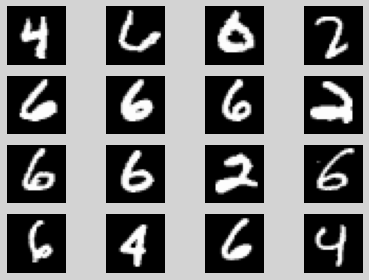

In [20]:
A_test, A_labels = generate_test(test, digits, N = 800)
print("Test data shape: ", A_test.shape) # Should be (784,2400)
print("Test labels shape: ", A_labels.shape) # Should be (2400)
print("First 16 labels: ", A_labels[:16])
plotimgs(A_test, nplot = 4)

As stated above, we need a score function to classify our results. What our score function will do is to project a dataset B, onto the basises in each dictionary, calculate the projected distance and classify each digit stored in B to a class by comparing the distances. We first write a function that creates dictionaries. Then we will classify the digits by two different functions, one for the SVD and one for the ENMF. To evaluate these functions, we will also write two functions that calculates the accuracy and recall, respectively. 

Firstly, we will classify and calculate the accuracy and recall for the digits $2,4$ and $6$. 


In [21]:
#TASK 3a)

delta = 10**-2 #sets a new safe-division factor for this task

def findDictionaries(digits, d):
    '''
    Calculates dictionaries for both SVD and ENMF

    Parameters
    ----------
    digits : 1D-array
        contains the digits we want to classify.
    d : int
        number of basis vectors.

    Returns
    -------
    NnDictionaries : 2D-array
        contains the non-negative dictionaries.
    OrtDictionaries : 2D-array
        contains the orthogonal dictionaries.

    '''
    NnDictionaries = []                                                         #create empty lists for the two dictionaries
    OrtDictionaries = []
    for i in digits:                                                            #creates dictionaries for SVD and ENMF and adds it to their respective lists
        A = train[:,i,:]
        U, Sigma, V_trans = np.linalg.svd(A, full_matrices=False)
        W_ort, H = truncSVD(U, Sigma, V_trans, d)
        OrtDictionaries.append(W_ort)
        W_nn = A[:, np.random.choice(A.shape[1],d, replace = False)]
        NnDictionaries.append(W_nn)

    return NnDictionaries, OrtDictionaries

def classificationOrt(test_data, dictionary):
    '''
    Classifies the projection onto orthogonal basis 

    Parameters
    ----------
    test_data : 2D-array
        contains the data to be used for testing.
    dictionary : 2D-array
        the dictionary to be used to calculate the projection onto.

    Returns
    -------
    classifiedNumbersOrt: 1D-array
        contains the classified numbers.
    minimumDistance : 2D-array
        contains the minimum distances.

    '''
    distance = np.ndarray(shape=(len(digits), test_data.shape[1]))              #empty array for the distances
    minimumDistance = np.zeros(len(digits))                                     #empty array for the minimum distances
    for i in range (0, len(digits)):                                            #calculates the distance and the minimum distance and adds it to their respective arrays
        distance[i] = columnwiseDistance(dictionary[i], test_data) 
        minimumDistance[i] = np.argmin(distance[i])
    distance = distance.T                                                       #transpose the array to get the correct distances
    classifiedNumbersOrt = np.zeros(test_data.shape[1])                         #empty array for the classified numbers
    for i in range(0,test_data.shape[1]):                                       #finds the minumum distance and the classification and adds it to their respective arrays
        a = np.argmin(distance[i])                                      
        classifiedNumbersOrt[i] = digits[a]
    return classifiedNumbersOrt, minimumDistance

    
def classificationNn(test_data, dictionary):
    '''
    Classifies the projection onto the non-negative basis

    Parameters
    ----------
    test_data : 2D-array
        contains the data to be used for testing.
    dictionary : 2D-array
        the dictionary to be used to calculate the projection onto..

    Returns
    -------
    classifiedNumbersNn : 1D-array
        contains the classified numbers.

    '''
    distance = np.ndarray(shape=(len(digits), test_data.shape[1]))              #empty array for the distances
    for i in range (0, len(digits)):                                            #calculates the distance and adds it to the array
        distance[i] = nnDistance(test_data, delta, 50, dictionary[i]) 
    distance = distance.T                                                       #transpose the array to get the correct distances
    classifiedNumbersNn = np.zeros(test_data.shape[1])                          #empty array for the classified numbers
    for i in range(0,test_data.shape[1]):                                       #finds the minimum distance and adds the classification to its array
        a = np.argmin(distance[i])
        classifiedNumbersNn[i] = digits[a]
    return classifiedNumbersNn

def accuracy(guess, solution):
    '''
    Calculates the accuracy of the classification

    Parameters
    ----------
    guess : 1D-array
        contains our predicted classes.
    solution : 1D-array
        contains the correct classes.

    Returns
    -------
    amountMissed : int
        amount predicted wrong.
    amountCorrect : int
        amount predicted correct.
    accuracy : float
        the accuracy of the classification.

    '''
    similarLetter = np.where(guess == solution, 1, 0)                          #gets an array of ones, where each one is given if the prediction is correct
    amountOfSimilarLetters = np.sum(similarLetter)                             #sums the amount
    accuracy = amountOfSimilarLetters/len(solution)                            #calculates the accuracy
    amountMissed = len(solution) - amountOfSimilarLetters                      #calculates the amount predicted wrong
    amountCorrect = len(solution) - amountMissed                               #calculates the amount predicted correctly
    return amountMissed, amountCorrect, accuracy


def recall(guess, solution):
    '''
    Calculates the recall for a class

    Parameters
    ----------
    guess : 1D-array
        contains our predicted classes.
    solution : 1D-array
        contains the correct classes.

    Returns
    -------
    recall_numbers : float
        the recall for a class.

    '''
    recallNumbers = np.zeros(len(digits))                                      #array with zeros to
    for i in range(len(digits)):                                                #counts the amount correct, wrong and calculates the recall for each iteration
        a = np.count_nonzero(guess==digits[i])
        b = np.count_nonzero(solution==digits[i])
        recallNumbers[i] = a/b
    return recallNumbers

In [22]:
#gets the values for the accuracy and recall
NnDictionaries, OrtDictionaries = findDictionaries(digits, 32)
classifiedNumbersOrt, minimumDistance = classificationOrt(A_test, OrtDictionaries)
classifiedNumbersNn = classificationNn(A_test, NnDictionaries)

amountMissed, amountCorrect, accuracySVD = accuracy(classifiedNumbersOrt, A_labels)
amountMissed, amountCorrect, accuracyNn = accuracy(classifiedNumbersNn, A_labels)
recallNumbersNn = recall(classifiedNumbersNn, A_labels)
recallNumbersOrt = recall(classifiedNumbersOrt, A_labels)

#prints out the accuracy and recall
table_data = [
    ['Method', 'Accuracy', f'Recall for {digits[0]}', f'Recall for {digits[1]}', f'Recall for {digits[2]}'],
    ['SVD', f'{accuracySVD}', f'{recallNumbersOrt[0]}', f'{recallNumbersOrt[1]}', f'{recallNumbersOrt[2]}'],
    ['ENMF', f'{accuracyNn}', f'{recallNumbersNn[0]}', f'{recallNumbersNn[1]}', f'{recallNumbersNn[2]}']
]

print(tabulate(table_data, headers='firstrow'))

Method      Accuracy    Recall for 2    Recall for 4    Recall for 6
--------  ----------  --------------  --------------  --------------
SVD         0.993333          0.9975         0.99875         1.00375
ENMF        0.973333          0.975          0.9975          1.0275


As we observe, the SVD-method has better accuracy than the ENMF. This might be because the SVD uses the first $d=32$ columns of $W$, which contains the most important features in the dataset. However, the ENMF-method is about $1\%$ to $2\%$ lower than the SVD, even though we generate 32 random columns from $A$.
 As we have mentioned earlier, the ENMF method is dependent of the numerical algorithm for calculating $H^{*}$. Since we don't use the convergence criteria, we find it reasonable to believe that the ENMF-method could provide a greater accuracy given a higher number of iterations in the calculation of $H^{*}.$ 
From the recall using the SVD-method, we see that there is not much bias towards one spesific class. However, we observe that for any of our given integers there may be a recall with the value higher than one, meaning there is some bias towards said class. The same holds for ENMF. We observe that the recall for every integers cannot be above the value one at the same time. Logic indicates that the average of all the recalls cannot be above the value one, as this would mean that we classify more numbers than we have in the dictionaries. 
The higher the accuracy, the less deviance from the value one in the recall. As we observe from the results, the deviance from the value one is higher for the recall from the ENMF. This is reasonable given the resulting accuracy is higher for SVD than for ENMF, meaning that the accuracy dictates the amount of deviance from the value one in the recall.


We will now project a dataset of a certain integer on a dictionary trained for said integer and store its distances. The one integer with the lowest value of distance is the integer which contains the most characteristics stored in the dictionary. This integer will be the one that contains the most typical characteristics of this integer. In addition to this, we will compare this with the projection of a said integer onto a dictionary trained on a different integer.  

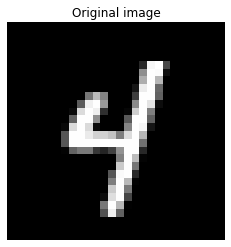

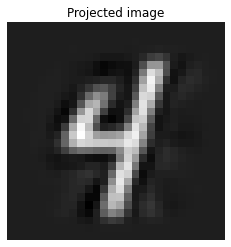

In [23]:
#TASK 3c)

#finds the dictionaries and projection
Wprojection = OrtDictionaries[1]
projection = orthproj(Wprojection,A_test[:,int(minimumDistance[1])])

#plots the result
plt.imshow(A_test[:,int(minimumDistance[1])].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.title('Original image')
plt.show()
plt.imshow(projection.reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.title('Projected image')
plt.show()

Correct number: 4.0, classified number: 6.0


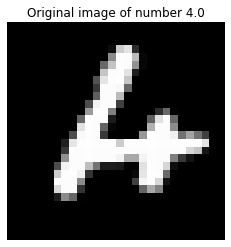

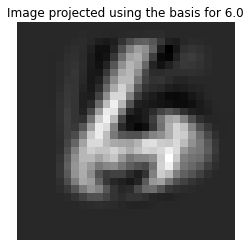

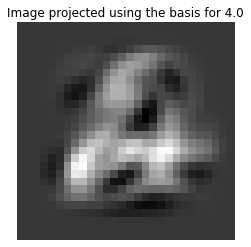

In [24]:
#TASK 3d)

def findMisclassified(A_labels, classifiedNumbersOrt, OrtDictionaries, digits, amountMissed):
    '''
    Finds the misclassified numbers

    Parameters
    ----------
    A_labels : 1D-array
        contains the correct classes.
    classifiedNumbersOrt : 1D-array
        contains the classified numbers from our model.
    OrtDictionaries : 2D-array
        the orthogonal dictionary.
    digits : 1D-array
        the integers to classify.
    amountMissed : int
        the amount of numbers wrongly predicted.

    Returns
    -------
    misclassifiedIndex: 1D-array
        contains the index of the wrongly classified numbers.
    misclassifiedNumbers : 1D-array
        contains the misclassified numbers.

    '''
    misclassifiedIndex = np.zeros(amountMissed)                                 #array with zeros for the misclassified index
    counter = 0
    for i in range(len(A_labels)):                                              #checks if numbers are misclassified and adds it to its array 
        if A_labels[i] != classifiedNumbersOrt[i]:
            misclassifiedIndex[counter] = i
            counter += 1
    misclassifiedIndex = np.rint(misclassifiedIndex).astype(int)                #convert every float in the array to int

    misclassifiedNumbers = np.ndarray(shape=(len(misclassifiedIndex), 2))       #empty array for the misclassified numbers
    for i in range(0, len(misclassifiedIndex)):                                 #finds the misclassified numbers and adds it to its array
        misclassifiedNumbers[i][0] = A_labels[misclassifiedIndex[i]]
        misclassifiedNumbers[i][1] = classifiedNumbersOrt[misclassifiedIndex[i]]

    print(f"Correct number: {misclassifiedNumbers[1][0]}, classified number: {misclassifiedNumbers[1][1]}")

    return misclassifiedIndex, misclassifiedNumbers

#gets the misclassified indices and numbers
misclassifiedIndex,misclassifiedNumbers = findMisclassified(A_labels, classifiedNumbersOrt, OrtDictionaries, digits, amountMissed)

#plots the original image and the images using the wrong basis
Wprojection = OrtDictionaries[int(np.searchsorted(digits, misclassifiedNumbers[5][1]))]
projection = orthproj(Wprojection,A_test[:,int(misclassifiedIndex[1])])
plt.imshow(A_test[:,int(misclassifiedIndex[1])].reshape((28,28)), cmap = 'gray')
plt.title(f"Original image of number {misclassifiedNumbers[1][0]}")
plt.axis('off')
plt.show()

plt.imshow(projection.reshape((28,28)), cmap = 'gray')
plt.title(f"Image projected using the basis for {misclassifiedNumbers[1][1]}")
plt.axis('off')
plt.show()

Wprojection1 = OrtDictionaries[int(np.searchsorted(digits, misclassifiedNumbers[5][0]))]
projection1 = orthproj(Wprojection1,A_test[:,int(misclassifiedIndex[1])])
plt.imshow(projection1.reshape((28,28)), cmap = 'gray')
plt.title(f"Image projected using the basis for {misclassifiedNumbers[1][0]}")
plt.axis('off')
plt.show()

From task $3c)$, we clearly see that the integer is classified correctly as the image thats projected resembles the original image. If we shift the focus to task $3d)$, we see that our model misclassified the integer. There are severe differences between the image closest to its basis and the misclassified image. The main difference is how the image can be seen as a generic number of that class, this is confirmed in the projection where it contains the characteristics of the image. In contrast the misclassified number does not look like a generic number, and this is also confirmed in the projection which is blurry and hard to see. Ths is further confirmed by looking at the result we discussed in task 2, the second plot has certain similiarities with the plot of the image projected with the wrong dictionary, such as blurriness. From the image projected with the basis for the integer $4$, we clearly see that the features of this number looks like the integer $6$. In addition to this, the generic $4$ usually do not have a long diagonal line which may attribute to the misclassification. 

**Note that if this notebook is run again, the specific features might change as the numbers might differ.

Since we have methods to classify the images and calculate the accuracy and recall, we would like to look at how this changes if we add an additional integer. To do this, we just add another integer to the digits list and generate a new test. 

In [25]:
# TASK 3e)

digits = [2,4,6,7] #adds another digit
A_test, A_labels = generate_test(test, digits, N = 800) #generate a new test and labels with the additional integer

#gets the values for the accuracy and recall
NnDictionaries, OrtDictionaries = findDictionaries(digits, 32)
classifiedNumbersOrt, minimumDistance = classificationOrt(A_test, OrtDictionaries)
classifiedNumbersNn = classificationNn(A_test, NnDictionaries)

amountMissed, amountCorrect, accuracySVD = accuracy(classifiedNumbersOrt, A_labels)
amountMissed, amountCorrect, accuracyNn = accuracy(classifiedNumbersNn, A_labels)
recallNumbersNn = recall(classifiedNumbersNn, A_labels)
recallNumbersOrt = recall(classifiedNumbersOrt, A_labels)

#prints out the accuracy and recall
table_data = [
    ['Method', 'Accuracy', f'Recall for {digits[0]}', f'Recall for {digits[1]}', f'Recall for {digits[2]}', f'Recall for {digits[3]}'],
    ['SVD', f'{accuracySVD}', f'{recallNumbersOrt[0]}', f'{recallNumbersOrt[1]}', f'{recallNumbersOrt[2]}', f'{recallNumbersOrt[3]}'],
    ['ENMF', f'{accuracyNn}', f'{recallNumbersNn[0]}', f'{recallNumbersNn[1]}', f'{recallNumbersNn[2]}', f'{recallNumbersNn[3]}']
]

print(tabulate(table_data, headers='firstrow'))

Method      Accuracy    Recall for 2    Recall for 4    Recall for 6    Recall for 7
--------  ----------  --------------  --------------  --------------  --------------
SVD         0.9825           1.005           1.005           1.0025          0.9875
ENMF        0.959688         0.96875         0.99625         1.02375         1.01125


The interesting result here is the drop in accuracy and increase in recall deviance. The accuracy for both methods drop by $\approx1.5\%$, and this could be caused by the increase in number of integers that we use. The reason for this could be that for a additional class, we get another dictionary and therefore another set of basises. That means that there is a higher probability of projecting onto the wrong basis for a non generic number. This is also reflected in the number for the recall of each class. We see that the recall increases for both methods, which makes sense given that we have one more dictionary than in $3d)$. 

We now want to see how the accuracy of our models depend on the amount of basis vectors we choose. We will do this with both the SVD method and the ENMF method. As we saw qualitatively in task $2$, the images became sharper the more basis vectors we choose. Furthermore, we have shown qualitatively in task $2$ how the more basisvectors we choose the more accurate our projection is by looking at the frobenius norm. We also observed how a dictionary will contain the most information about the image of a digit if we choose a large amount of basis vectors, therefore we should expect an increase in accuracy as we increase the amount of basisvectors.



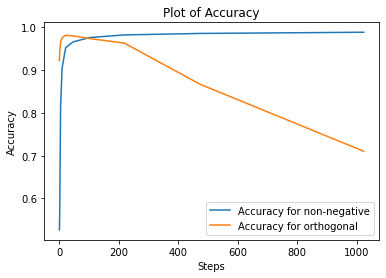

In [26]:
steps = np.logspace(0, 10, num= 10, base = 2)
steps = np.rint(steps).astype(int)

def accuracyOfClassification(steps, digits):
    '''
    Calculates the accuracy of the classification

    Parameters
    ----------
    steps : TYPE
        DESCRIPTION.
    digits : 1D-array
        contains the digits to test.

    Returns
    -------
    accuracyNN : 1D-array
        contains the accuracy of the ENMF method.
    accuracyORT : 1D-array
        contains the accuracy of the SVD method.

    '''
    #Creates the lists nescessary to store information
    accuracyNN = np.zeros(len(steps))
    accuracyORT = np.zeros(len(steps))
    NNDictionaries = []
    SVDDictionares = []
    SVDindex = []
    NNindex = []

    #Create dictionaries for different d
    for i in range(0, len(steps)):
        NnDictionaries, OrtDictionaries = findDictionaries(digits, steps[i])
        NNDictionaries.append(NnDictionaries)
        SVDDictionares.append(OrtDictionaries)
    
    #Find the indices for the methods and stores them in arrays
    for i in range(0, len(NNDictionaries)):
        svdindeks, minimum_distance = classificationOrt(A_test, SVDDictionares[i])
        nnindex = classificationNn(A_test, NNDictionaries[i])
        SVDindex.append(svdindeks)
        NNindex.append(nnindex)

    #Calculates the accuracy and stores them in arrays
    for i in range(0, len(steps)):
        amountMissed1, amountCorrect2, accuracynn = accuracy(NNindex[i], A_labels)
        amountMissed1, amountCorrect2, accuracyort = accuracy(SVDindex[i], A_labels)
        accuracyNN[i] = accuracynn
        accuracyORT[i] = accuracyort
    

    return accuracyNN, accuracyORT

#gets the values
accuracyNN, accuracyORT = accuracyOfClassification(steps, digits)
    
#plots the accuracy
plt.plot(steps,accuracyNN, label = "Accuracy for non-negative")
plt.plot(steps,accuracyORT, label = "Accuracy for orthogonal")
plt.title("Plot of Accuracy")
plt.legend()
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.show()

As we can observe from the plot the SVD is significantly more accurate with a lower amount of basis vectors compared to the ENMF. But as the amount of basis vector increases the SVDs accuracy drops quite significant, while the ENMF keeps the accuracy close to constant. This is interesting as we expected the accuracy to increase for the SVD as explained above the code.

To discuss this behaviour we will have to look at how the different methods work. The ENMF chooses random pictures as its basis vectors. Thus a large amount of basis vectors means its dictionary consists of several versions of an image of the integer. Whereas the SVD method calculates and consider which characteristics about an integer is most important. If one were to choose a large amount of basisvectors for the dictionary created by the SVD, it will consist of more insignificant information. Thus the small variances in an image will be more significant. It can therefore seem like this information distorts its ability to separate images of different integers from eachother. 

Another reason the accuracy decreases as much as it is could be how we increase the dimension of A by increasing the amount of basisvectors. This increase in dimension affects the projections in such a way it is no longer capable of interpreting an image of a integer. 

From the plot we observe that the accuracy for the ENMF method increases as $d$ increases, which means that this method is the most accurate for the highest amount of $d$. Since this method requires a lot of storage space, it would suffice with $d\approx100$, depending on the dataset. For the SVD method, we clearly see that a small amount of $d$ gives the best accuracy. In this case, $d\approx50$, if not smaller, would be the best choice. 

We have now seen how one could approach dictionary learning applied on the MNIST dataset. The approach we have taken with the dictionary by using SVD is to first calculate the full SVD, and create the truncated SVD by removing basis vectors that contain little to no useful information. This approach will have a long computational time on larger datasets. On the other hand, if one would calculate the truncated SVD first, then the computational time will be decreased significantly. The SVD approach can reduce the dimensionality of the dataset while preserving the most important features (like the features of integers). In task $3f)$, we saw this method is most accurate with a low amount of basis vectors. As we have seen from the recall in task $3b,e)$ and qualitatively in task $2$, it's important to note that it seems that the SVD is somewhat vulnerable to outliers (like misclassification of integers).


The ENMF doesn't require any training, and can therefore be used to other purposes. In addition to this, it works well on datasets like images because they are often non-negative. While there are many positive attributes for the ENMF, one disadvantage is the fact that it chooses its basis vectors randomly. If poorly selected, it could mean that we for example don't get very sharp images. One other disadvantage as mentioned earlier in the report is the calculation of $H^{*}$, as we don't meet the convergence criteria because we want to save computational time. This could of course improve the method if one where to implement the right criteria. 

The ENMF-approach on dictionaries demands less memory and storage space as it chooses its basis vectors randomly from the dataset. This method is very fast in calculating dictionaries, its accuracy is dependent on the amount of basis vectors, where it has to be large enough to keep a suitable accuracy. The SVD is, on the other hand, slower in calculating the dictionaries, but can keep a higher accuracy with less basis vectors. Therefore it can use less memory than the ENMF. 

In terms of the way we classify the integers, one could argue that it's not as effective as it could have been. The reason for this is that we use a lot of memory and storage space in calculating the dictionaries before we try to classify the integers. In terms of the way we evaluate how well our classification has worked, we particurarly find the recall very nescessary as it gives an insight in bias towards different classes. The accuracy is also a good measure on how the classification has worked overall, but for purposes where we have multiple objects to classify, the recall is most definitely an important factor. 

### Conclusion

Throughout this project we have implemented the necessary steps needed to demonstrate dictionary learning. Starting with the writing of the crucial functions for SVD-calculation and ENMF-method who in turn played an instrumental part in dictionary learning at this level. The correct execution of these functions made it possible to expand our algorithm to the MNIST data set. At this point we were able to experiment with creating images of an integer from our data set, while comparing them to projections of the same integer. Here we demonstrated the importance of training our algorithm to the correct integer. Moving to our last section of this report we were able to test the quality and accuracy of our functions by classification. Here we tested where our algorithm misclassified the numbers, and displayed it through recall and accuracy. We find the overall approach to classification reasonably good, but in our opinion, the ENMF-approach would be the best. This is because the images are non-negative, as well as it doesn't require any training. We believe that even though we get a lower accuracy than for the SVD, that the ENMF with the convergence criteria and enough basis vectors, would be the better approach as the MNIST dataset is relatively large. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d2d571ba-3239-45cc-a58e-cf546816d9cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>